[Intro to Dense Vectors for NLP and Vision - YouTube](https://www.youtube.com/watch?v=bVZJ_O_-0RE&list=PLIUOU7oqGTLgz-BI8bNMVGwQxIMuQddJO)

NLP: Natural Language Processing

Sparse Vector:

- For recommendation systems
- {index:waarde}={1:0.8,3:0.1,5:0.3,6:0.2,8:0.9}
  Dense Vector:
- For machine learning, graphics, meaning, etc.
- [0.5,0.8,0.0,0.1,0.0,0.3,0.2,0.0,0.9,0.0]

In [ ]:
%pip install sentence-transformers

In [4]:
from sentence_transformers import SentenceTransformer
# https://www.sbert.net/

# A model to embed sentences, embedded saerch queries, and paragraphs
model = SentenceTransformer('all-mpnet-base-v2')

d:\yanni\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
sentences = [
    "it caught him off guard space smelled of seared steak",
    "it took him by surprise space had the scent of grilled meat",
    "he was amazed to find that space had a smell resembling roasted beef",
    "in space, he detected an unexpected aroma similar to that of a barbecue",
    "the sudden rain in the desert was a beautiful sight",
    "to his astonishment, the vastness of space smelled like a cooked meal",
    "mountains have a serene beauty that calms the spirit",
    "it caught him off guard when he realized that space had a distinct scent",
    "underwater life is colorful and full of mysteries",
    "he never imagined space would remind him of his favorite meal"
]


In [6]:
embeddings = model.encode(sentences)
embeddings.shape

(10, 768)

In [23]:
from sentence_transformers.util  import cos_sim

scores = cos_sim(embeddings[0], embeddings[1:])
scores

tensor([[0.8787, 0.8123, 0.7374, 0.3242, 0.7383, 0.1854, 0.8301, 0.1178, 0.6316]])

In [21]:
sentences[scores.argmax()]

'it caught him off guard space smelled of seared steak'

Open-domain vraag-en-antwoord (Open-domain Question Answering, ODQA) is een taak in de natuurlijke taalverwerking (NLP) waarbij een systeem vragen moet beantwoorden zonder vooraf beperkt te zijn tot een specifiek onderwerp of domein. 

Vraag: Een gebruiker stelt een vraag (de blauwe cirkel).

Contexts Index Database: Dit is een database met vooraf berekende embeddings van teksten waarin antwoorden kunnen worden gevonden.

Dense Passage Retrieval Retriever: Dit component zoekt in de database naar de meest relevante teksten (contexten) op basis van de vraag.

BERT-QA Reader: Uit de geselecteerde contexten leest BERT-QA en bepaalt het specifieke antwoord op de vraag.

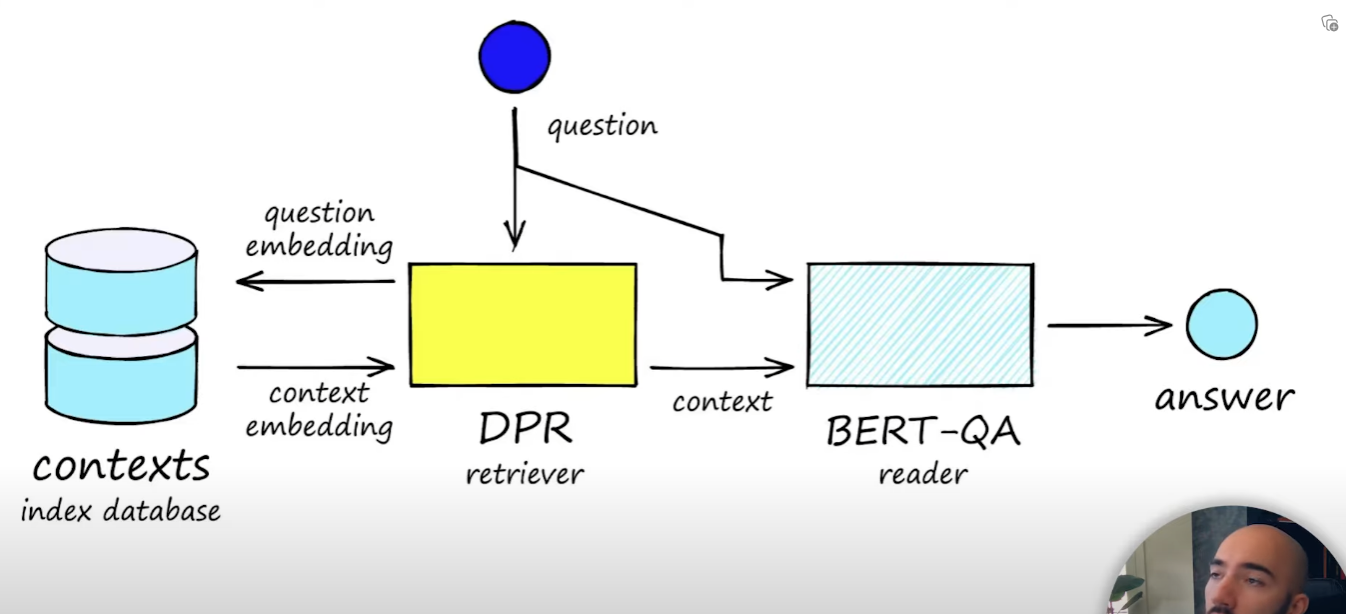

In [ ]:
%pip install transformers
# https://pypi.org/project/transformers/

In [27]:
from transformers import DPRContextEncoderTokenizer, DPRContextEncoder, DPRQuestionEncoderTokenizer, DPRQuestionEncoder

In [ ]:
# Download 4 sets of tokenizers and models
ctx_model = DPRContextEncoder.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')
ctx_tokenizer = DPRContextEncoderTokenizer.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')

question_model = DPRQuestionEncoder.from_pretrained('facebook/dpr-question_encoder-single-nq-base')
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained('facebook/dpr-question_encoder-single-nq-base')

In [29]:
questions = [
    "wat is the capital city of australia?",
    "what is the best selling sci-fi book?"
]

context = [
    "canberra is the capital city of australia",
    "what is the capital city of australia?",
    "the capital city of france is paris",
    "the best-selling sci-fi book is dune",
]

In eenvoudige bewoordingen van wat hieronder gebeurt, deze code verandert een lijst van zinnen (context) in een set van vectoren (xb) die deze zinnen vertegenwoordigen, zodat ze later kunnen worden vergeleken of gezocht in relatie tot andere vectoren (bijv. de vragen). 

In [34]:
# Tokenize evertying

# ctx_tokenizer lijkt een tokenizer te zijn die specifiek is voor DPRContext (zoals eerder besproken). Het zet de zinnen in de context lijst om in tokens.
# max_length=256 beperkt de lengte van de tokenlijsten tot 256.
# padding='max_length' zorgt ervoor dat alle tokenlijsten dezelfde lengte van 256 hebben door ze indien nodig aan te vullen.
# return_tensors='pt' geeft aan dat de output tensors moet zijn, geschikt voor PyTorch (waarschijnlijk is dit bedoeld).
xb_tokens = ctx_tokenizer(context, max_length=256, padding='max_length',
                          return_tensors='pt')
# Nadat de context lijst is getokeniseerd met ctx_tokenizer, worden de tokens door het model ctx_model gevoerd.
xb = ctx_model(**xb_tokens)

xq_tokens = question_tokenizer(questions, max_length=256, padding='max_length',
                               return_tensors='pt')
xq = question_model(**xq_tokens)


In [38]:
xq.pooler_output.shape, xb.pooler_output.shape 

(torch.Size([2, 768]), torch.Size([4, 768]))

In [ ]:
import torch 

for i, xq_vec in enumerate(xq.pooler_output):